IN THIS MODEL TRAINING, WE IMPORTED THE DATASET,FOUND OUT CORRELATIONS BETWEEN VARIABLES AND IMPLEMENTED MACHINE LEARNING CLASSIFICATION ALGORITHMS LIKE k-NEIGHBORS CLASSIFIER, SUPPORT VECTOR MACHINE, DECISION TREE, NAIVE BAYES ETC.

Impporting Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("/content/cancer patient data sets.csv")

In [3]:
df.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

<ipython-input-35-0e1845ecb9dc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


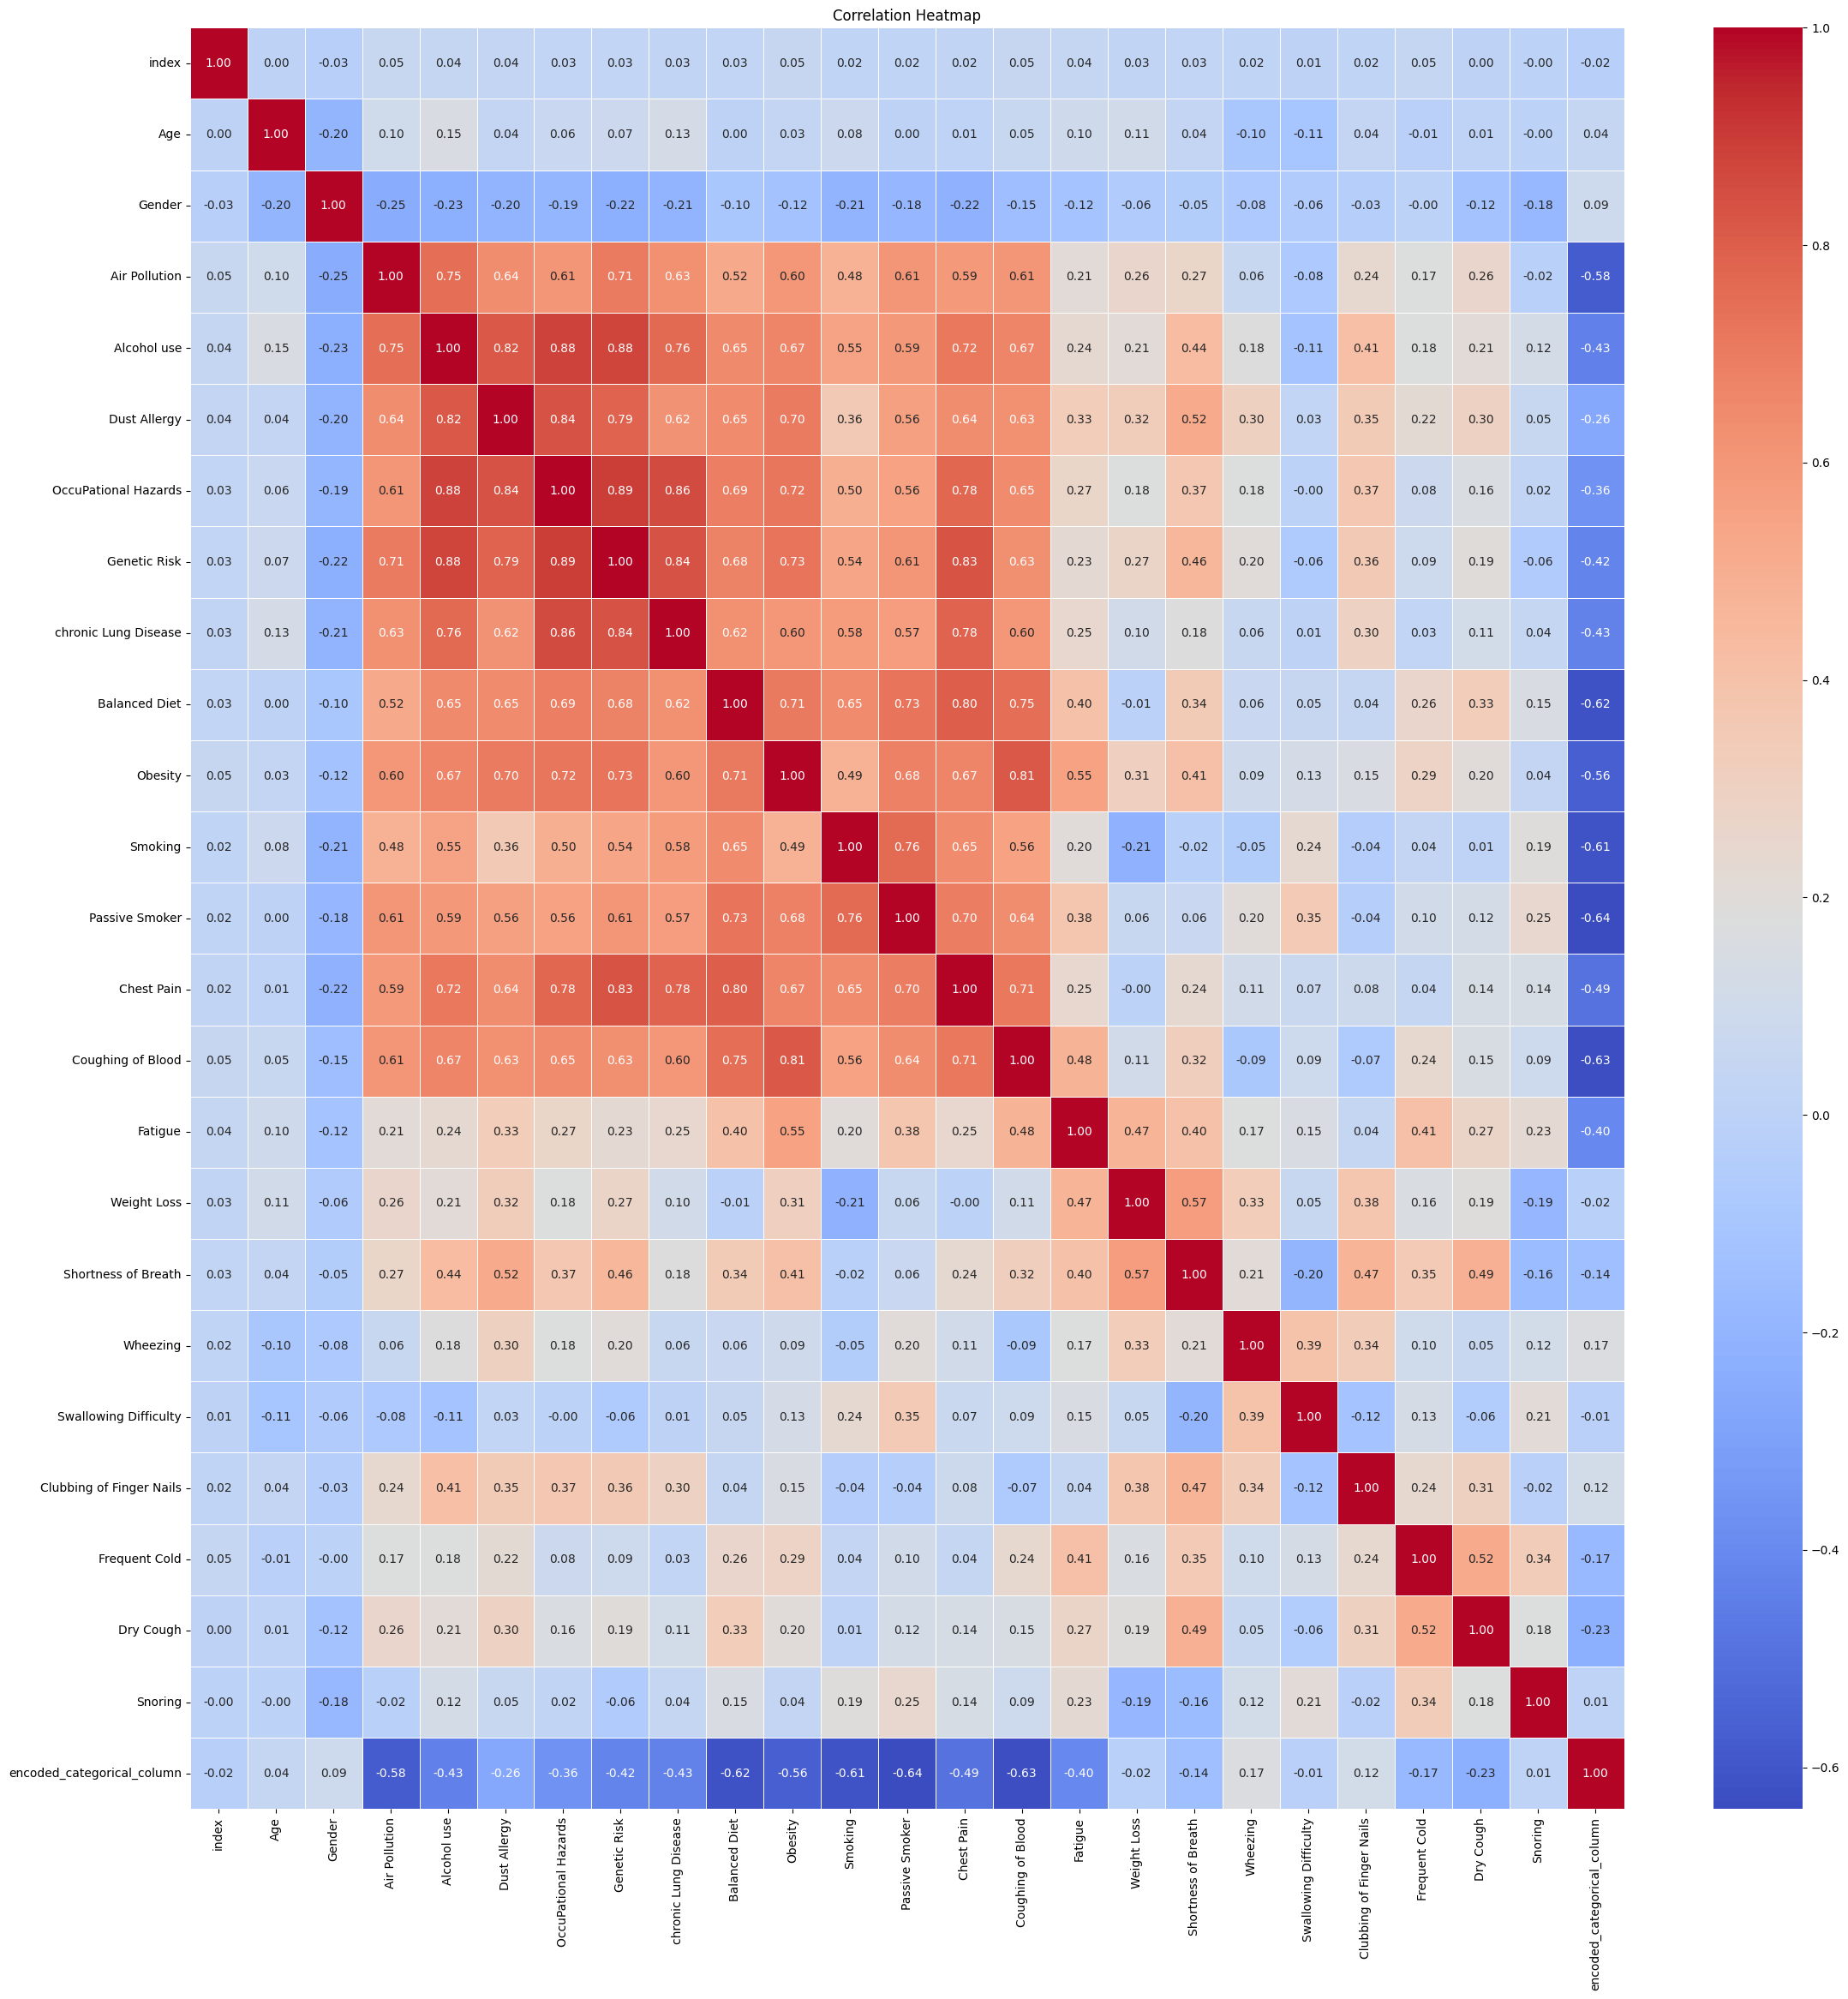

In [35]:
corr_matrix = df.corr()
plt.figure(figsize=(27, 27))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Defining Training and Testing Datasets

In [60]:
X=df[["Age","Gender","Alcohol use","Genetic Risk","Shortness of Breath","Swallowing Difficulty","Frequent Cold","Dry Cough"]]
y=df["Level"]

In [61]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

K-Nearest Neighbour

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
y_pred = knn.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9966666666666667


In [18]:
import pickle
pickle.dump(knn,open("trained_model.pkl","wb"))

In [65]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 98,   0,   1],
       [  0,  93,   0],
       [  0,   0, 108]])

In [66]:
data_knn=pd.DataFrame({"Actual Result":y_test,"Predicted Result":y_pred})
data_knn.head(5)

,Actual Result,Predicted Result
5,High,High
944,Low,Low
271,Low,Low
485,Low,Low
111,High,High


In [67]:
sample_result=np.array([[21,3,6,4,5,3,4,3]])
print("predicted: {}".format(knn.predict(sample_result)))
print(knn.predict(sample_result))

predicted: ['Medium']
['Medium']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [68]:
df["Level"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

SVM

In [69]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [70]:
y_pred_svm = svm.predict(X_test)

In [71]:
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.9433333333333334


In [72]:
cm = confusion_matrix(y_test,y_pred_svm)
cm

array([[ 96,   0,   3],
       [  6,  79,   8],
       [  0,   0, 108]])

In [73]:
data_svm=pd.DataFrame({"Actual Result":y_test,"Predicted Result":y_pred_svm})

In [74]:
data_svm.head(5)

,Actual Result,Predicted Result
5,High,High
944,Low,Low
271,Low,Medium
485,Low,Low
111,High,High


In [75]:
sample_result=np.array([[21,3,4,6,2,3,4,3]])
print("predicted: {}".format(svm.predict(sample_result)))

predicted: ['Medium']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Decision Tree Classifier

In [76]:
dtc = DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=20)
dtc.fit(X_train, y_train)
y_pred_dtc=dtc.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


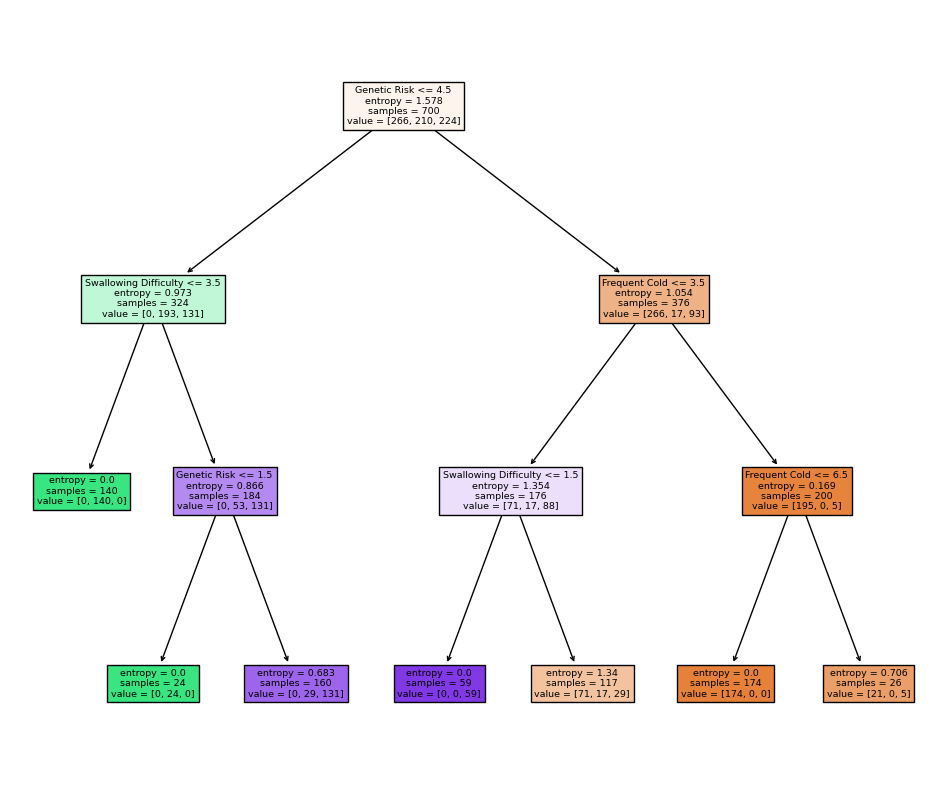

In [78]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12,10))
plot_tree(dtc, filled=True, feature_names=X.columns)
plt.show()

In [79]:
sample_result=np.array([[21,3,4,6,2,3,4,3]])
print("predicted: {}".format(dtc.predict(sample_result)))

predicted: ['High']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Gaussian Naive Beyes

In [80]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [81]:
y_pred_gnb=gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gnb)
print("Accuracy:", accuracy)

Accuracy: 0.7233333333333334


In [82]:
data_gnb=pd.DataFrame({"Actual Result":y_test,"Predicted Result":y_pred_gnb})

In [83]:
data_gnb.head(5)

,Actual Result,Predicted Result
5,High,High
944,Low,Low
271,Low,Low
485,Low,Low
111,High,High


In [84]:
sample_result=np.array([[21,3,4,6,2,3,4,3]])
print("predicted: {}".format(gnb.predict(sample_result)))

predicted: ['Low']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Bernoulli Naive Beyes

In [85]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

In [86]:
y_pred_bnb=bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_bnb)
print("Accuracy:", accuracy)

Accuracy: 0.33


In [87]:
data_bnb=pd.DataFrame({"Actual Result":y_test,"Predicted Result":y_pred_bnb})

In [88]:
data_bnb.head(5)

,Actual Result,Predicted Result
5,High,High
944,Low,High
271,Low,High
485,Low,High
111,High,High


In [89]:
sample_result=np.array([[21,3,4,6,2,3,4,3]])
print("predicted: {}".format(bnb.predict(sample_result)))

predicted: ['High']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


Multinomial Naive Beyes

In [91]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [92]:
y_pred_mnb=mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_mnb)
print("Accuracy:", accuracy)

Accuracy: 0.56


In [93]:
data_mnb=pd.DataFrame({"Actual Result":y_test,"Predicted Result":y_pred_mnb})

In [94]:
data_mnb.head(5)

,Actual Result,Predicted Result
5,High,High
944,Low,Low
271,Low,Low
485,Low,Medium
111,High,Medium


In [95]:
sample_result=np.array([[21,3,4,6,2,3,4,3]])
print("predicted: {}".format(mnb.predict(sample_result)))

predicted: ['High']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
